<a href="https://colab.research.google.com/github/YunhZhang/CS541/blob/HW5/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
(x_train, y_train_raw), (x_test, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [11]:
def vec2matrix(y):
    n = y.shape[0]
    y_table = np.zeros((n, 10))
    for i in range(len(y)):
        y_table[i, y[i]] = 1
    return y_table

y_train = vec2matrix(y_train_raw)
y_test = vec2matrix(y_test_raw)

In [12]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000, 10)


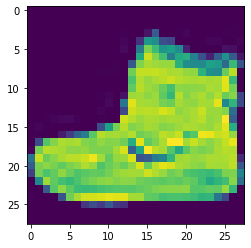

In [13]:
img_index = 0
plt.imshow(x_train[img_index])

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train ,
                                   random_state=42, 
                                   test_size=0.2, 
                                   shuffle=True)

In [15]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)


x_train shape: (48000, 28, 28) y_train shape: (48000, 10)
x_valid shape: (12000, 28, 28) y_valid shape: (12000, 10)


In [16]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Epoch 1/10
750/750 [==============================] - 81s 106ms/step - loss: 0.6380 - accuracy: 0.7626 - val_loss: 0.4215 - val_accuracy: 0.8534
Epoch 2/10
750/750 [==============================] - 79s 106ms/step - loss: 0.4397 - accuracy: 0.8404 - val_loss: 0.3410 - val_accuracy: 0.8766
Epoch 3/10
750/750 [==============================] - 77s 102ms/step - loss: 0.3932 - accuracy: 0.8591 - val_loss: 0.3198 - val_accuracy: 0.8817
Epoch 4/10
750/750 [==============================] - 77s 102ms/step - loss: 0.3630 - accuracy: 0.8667 - val_loss: 0.2916 - val_accuracy: 0.8934
Epoch 5/10
750/750 [==============================] - 77s 103ms/step - loss: 0.3385 - accuracy: 0.8757 - val_loss: 0.2733 - val_accuracy: 0.8949
Epoch 6/10
750/750 [==============================] - 77s 102ms/step - loss: 0.3180 - accuracy: 0.8826 - val_loss: 0.2715 - val_accuracy: 0.8983
Epoch 7/10
750/750 [==============================] - 78s 104ms/step - loss: 0.3087 - accuracy: 0.8871 - val_loss: 0.2610 - val_ac

In [19]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.909600019454956
